In [1]:
from skimage import color ,transform,exposure
from PIL import Image
#import cv2
import numpy as np
from skimage.feature import hog
import os 
import glob as gb
import  matplotlib.pyplot as plt
import pandas as pd
import tensorflow as ts
import numpy as np

In [2]:
import os
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

# Define paths
dataset_path = r'C:\Users\DELL\Downloads\IBM\Teeth DataSet\Teeth_Dataset\Training'


# Define the angles for rotation
angles = [45, 90, 120, 210, 180]

# Estimate number of images
num_folders = len(os.listdir(dataset_path))
num_angles = len(angles) + 1  # including the flipped image
image_size = (256, 256, 3)

# Calculate the number of images
num_images = sum(len(gb.glob(os.path.join(dataset_path, folder, '*.jpg'))) for folder in os.listdir(dataset_path))
num_augmented_images = num_images * num_angles
num_labels = num_images * num_angles

# Initialize NumPy arrays
x_train = np.zeros((num_augmented_images + num_images, *image_size), dtype=np.float32)
y_train = np.zeros(num_labels + num_images, dtype=np.int32)

# Process images
index = 0
label_index = 0

for folder in os.listdir(dataset_path):
    files = gb.glob(os.path.join(dataset_path, folder, '*.jpg'))
    print(f"For training data, found {len(files)} files in folder {folder}")
    
    for file in files:
        image = plt.imread(file)
        image = transform.resize(image, image_size, anti_aliasing=True)
        
        # Store the original image
        x_train[index] = image
        y_train[index] = {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}.get(folder, -1)
        index += 1
        
        # Augmentations: Rotate images and flip vertically
        for angle in angles:
            rotated_image = transform.rotate(image, angle).astype(np.float32)
            x_train[index] = rotated_image
            y_train[index] = {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}.get(folder, -1)
            index += 1
        
        # Flip the original image vertically
        flipped_image = np.flipud(image)
        x_train[index] = flipped_image
        y_train[index] = {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}.get(folder, -1)
        index += 1



print("Data processing and saving complete.")


For training data, found 480 files in folder CaS
For training data, found 450 files in folder CoS
For training data, found 360 files in folder Gum
For training data, found 540 files in folder MC
For training data, found 324 files in folder OC
For training data, found 540 files in folder OLP
For training data, found 393 files in folder OT
Data processing and saving complete.


In [3]:
# Convert lists to numpy arrays
print(x_train.shape,y_train.shape)



(21609, 256, 256, 3) (21609,)


In [4]:
import numpy as np

# Assuming y_train is your array
unique_labels, counts = np.unique(y_train, return_counts=True)

# Combine the labels and their counts into a dictionary (similar to value_counts())
label_counts = dict(zip(unique_labels, counts))

# Print the result
print(label_counts)


{0: 3360, 1: 3150, 2: 2520, 3: 3780, 4: 2268, 5: 3780, 6: 2751}


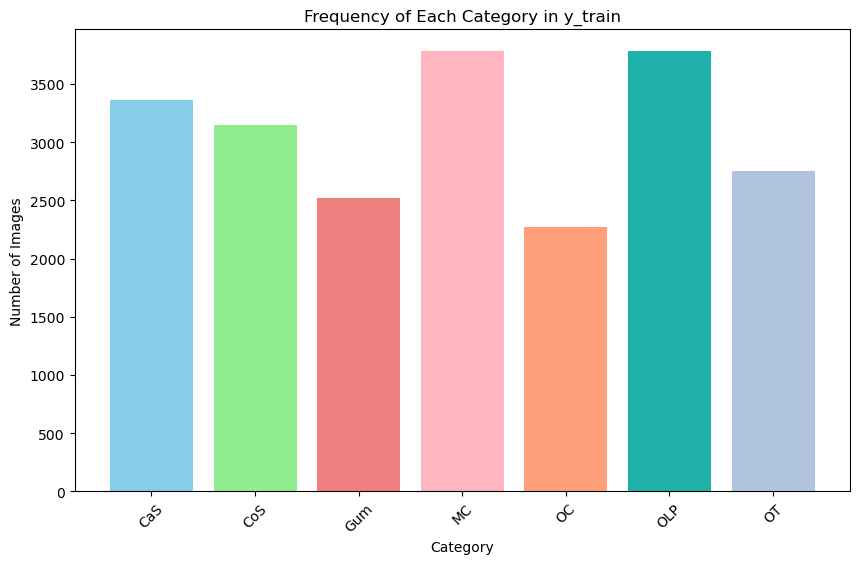

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train is already defined and populated
unique_labels, counts = np.unique(y_train, return_counts=True)

# Define label names (assuming you're using the same label mapping as before)
label_names = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# Define a list of colors for each category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_names, counts, color=colors)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Frequency of Each Category in y_train')
plt.xticks(rotation=45)
plt.show()


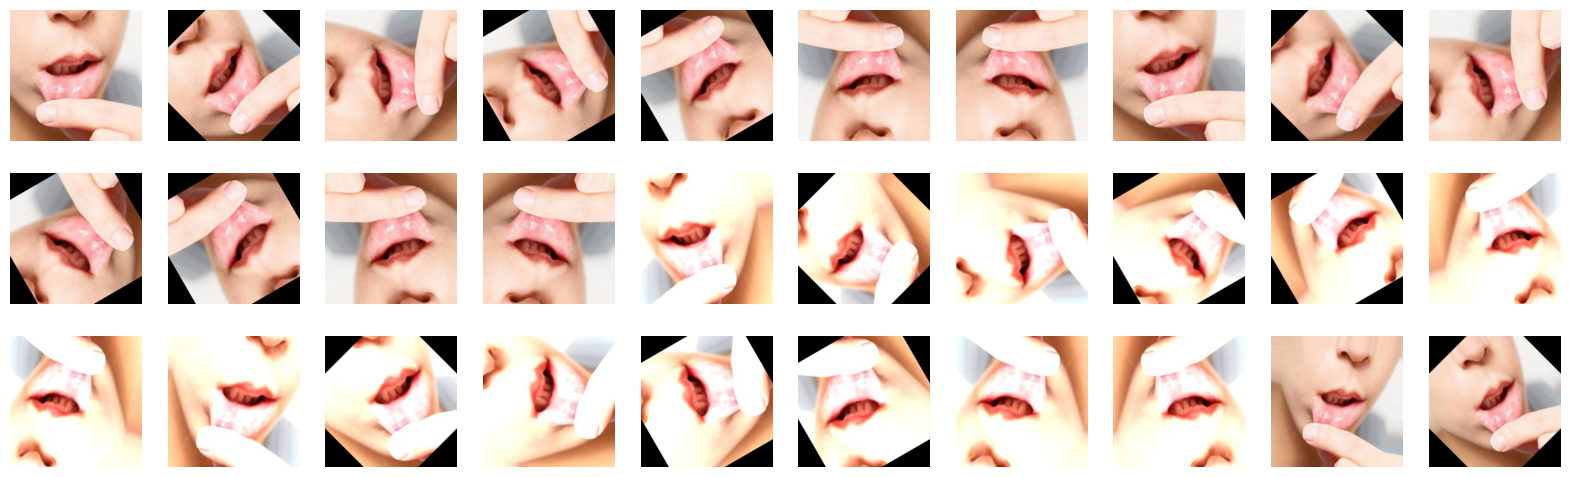

In [6]:
import matplotlib.pyplot as plt

# Define the number of images you want to display
num_images = 30

# Determine the number of rows and columns
rows = 3
cols = 10

# Set up the figure with a grid of subplots, adjusting figsize to fit all images
fig, axes = plt.subplots(rows, cols, figsize=(20, 6))

# Loop through the images and plot them
for i in range(num_images):
    row = i // cols
    col = i % cols
    axes[row, col].imshow(x_train[i])
    axes[row, col].axis('off')  # Hide axes

# If the grid has more subplots than images, hide the empty ones
for i in range(num_images, rows * cols):
    fig.delaxes(axes.flatten()[i])

# Display the plot
plt.show()


In [7]:
import os
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

# Define paths
dataset_path = r'C:\Users\DELL\Downloads\IBM\Teeth DataSet\Teeth_Dataset\Validation'




# Estimate number of images
num_folders = len(os.listdir(dataset_path))
num_angles = 0
image_size = (256, 256, 3)

# Calculate the number of images
num_images = sum(len(gb.glob(os.path.join(dataset_path, folder, '*.jpg'))) for folder in os.listdir(dataset_path))
num_augmented_images = num_images * num_angles
num_labels = num_images * num_angles

# Initialize NumPy arrays
x_val = np.zeros((num_augmented_images + num_images, *image_size), dtype=np.float32)
y_val = np.zeros(num_labels + num_images, dtype=np.int32)

# Process images
index = 0
label_index = 0

for folder in os.listdir(dataset_path):
    files = gb.glob(os.path.join(dataset_path, folder, '*.jpg'))
    print(f"For training data, found {len(files)} files in folder {folder}")
    
    for file in files:
        image = plt.imread(file)
        image = transform.resize(image, image_size, anti_aliasing=True)
        
        # Store the original image
        x_val[index] = image
        y_val[index] = {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}.get(folder, -1)
        index += 1
        
        


print("Data processing and saving complete.")


For training data, found 160 files in folder CaS
For training data, found 149 files in folder CoS
For training data, found 120 files in folder Gum
For training data, found 180 files in folder MC
For training data, found 108 files in folder OC
For training data, found 180 files in folder OLP
For training data, found 131 files in folder OT
Data processing and saving complete.


In [8]:
import numpy as np

# Assuming y_train is your array
unique_labels, counts = np.unique(y_val, return_counts=True)

# Combine the labels and their counts into a dictionary (similar to value_counts())
label_counts = dict(zip(unique_labels, counts))

# Print the result
print(label_counts)


{0: 160, 1: 149, 2: 120, 3: 180, 4: 108, 5: 180, 6: 131}


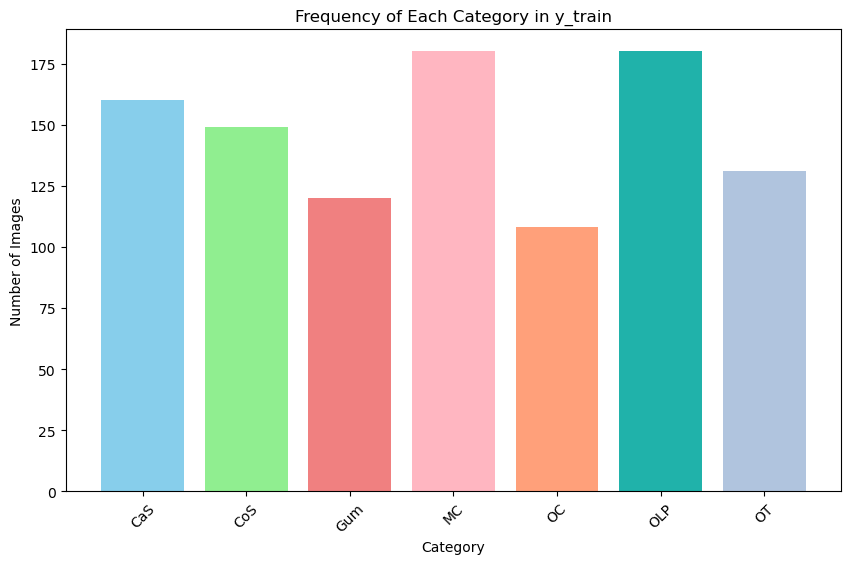

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train is already defined and populated
unique_labels, counts = np.unique(y_val, return_counts=True)

# Define label names (assuming you're using the same label mapping as before)
label_names = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']

# Define a list of colors for each category
colors = ['skyblue', 'lightgreen', 'lightcoral', 'lightpink', 'lightsalmon', 'lightseagreen', 'lightsteelblue']

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(label_names, counts, color=colors)
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.title('Frequency of Each Category in y_train')
plt.xticks(rotation=45)
plt.show()


In [17]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

model = Sequential([
    layers.Conv2D(64, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),  # Add batch normalization

    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),  # Add batch normalization

    layers.Conv2D(256, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),  # Add batch normalization

    layers.Conv2D(512, (3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),  # Add batch normalization

    layers.GlobalAveragePooling2D(),  # Use global average pooling instead of flatten
    layers.Dropout(0.5),  # Regular dropout to reduce overfitting
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),  # Regular dropout to reduce overfitting
    layers.Dense(128, activation='relu'),
    layers.Dense(64, activation='relu'),
    layers.Dense(7, activation='softmax')  # Output layer for 7 classes
])


In [18]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3)


In [19]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [20]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 254, 254, 64)      1792      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 127, 127, 64)     0         
 2D)                                                             
                                                                 
 batch_normalization_4 (Batc  (None, 127, 127, 64)     256       
 hNormalization)                                                 
                                                                 
 conv2d_5 (Conv2D)           (None, 125, 125, 128)     73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 62, 62, 128)      0         
 2D)                                                             
                                                      

In [21]:
# model.fit(x_train, y_train, epochs=20, batch_size=32,validation_data=(x_val,y_val))
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    validation_data=(x_val,y_val),
    steps_per_epoch=len(x_train) // 32,  # Number of batches per epoch
    validation_steps=len(x_val) // 32,  # Number of batches for validation
    callbacks=[early_stopping, reduce_lr]  # Use callbacks
)

Epoch 1/20
675/675 [==============================] - 1648s 2s/step - loss: 1.6158 - accuracy: 0.3544 - val_loss: 2.1110 - val_accuracy: 0.2695 - lr: 0.0010
Epoch 2/20
675/675 [==============================] - 1837s 3s/step - loss: 1.2944 - accuracy: 0.4964 - val_loss: 2.0220 - val_accuracy: 0.3220 - lr: 0.0010
Epoch 3/20
675/675 [==============================] - 1186s 2s/step - loss: 1.0946 - accuracy: 0.5793 - val_loss: 1.6500 - val_accuracy: 0.4348 - lr: 0.0010
Epoch 4/20
675/675 [==============================] - 1187s 2s/step - loss: 0.9032 - accuracy: 0.6635 - val_loss: 1.4888 - val_accuracy: 0.5292 - lr: 0.0010
Epoch 5/20
675/675 [==============================] - 1323s 2s/step - loss: 0.7087 - accuracy: 0.7368 - val_loss: 2.4822 - val_accuracy: 0.4679 - lr: 0.0010
Epoch 6/20
675/675 [==============================] - 1348s 2s/step - loss: 0.5547 - accuracy: 0.7994 - val_loss: 0.7780 - val_accuracy: 0.7160 - lr: 0.0010
Epoch 7/20
675/675 [==============================] - 1796

In [22]:
import os
import glob as gb
import numpy as np
import matplotlib.pyplot as plt
from skimage import transform

# Define paths
dataset_path = r'C:\Users\DELL\Downloads\IBM\Teeth DataSet\Teeth_Dataset\Testing'




# Estimate number of images
num_folders = len(os.listdir(dataset_path))
num_angles = 0
image_size = (256, 256, 3)

# Calculate the number of images
num_images = sum(len(gb.glob(os.path.join(dataset_path, folder, '*.jpg'))) for folder in os.listdir(dataset_path))
num_augmented_images = num_images * num_angles
num_labels = num_images * num_angles

# Initialize NumPy arrays
x_test = np.zeros((num_augmented_images + num_images, *image_size), dtype=np.float32)
y_test = np.zeros(num_labels + num_images, dtype=np.int32)

# Process images
index = 0
label_index = 0

for folder in os.listdir(dataset_path):
    files = gb.glob(os.path.join(dataset_path, folder, '*.jpg'))
    print(f"For training data, found {len(files)} files in folder {folder}")
    
    for file in files:
        image = plt.imread(file)
        image = transform.resize(image, image_size, anti_aliasing=True)
        
        # Store the original image
        x_test[index] = image
        y_test[index] = {'CaS': 0, 'CoS': 1, 'Gum': 2, 'MC': 3, 'OC': 4, 'OLP': 5, 'OT': 6}.get(folder, -1)
        index += 1
        
        


print("Data processing and saving complete.")


For training data, found 160 files in folder CaS
For training data, found 149 files in folder CoS
For training data, found 120 files in folder Gum
For training data, found 180 files in folder MC
For training data, found 108 files in folder OC
For training data, found 180 files in folder OLP
For training data, found 131 files in folder OT
Data processing and saving complete.


33/33 [==============================] - 14s 391ms/step
Accuracy: 0.99


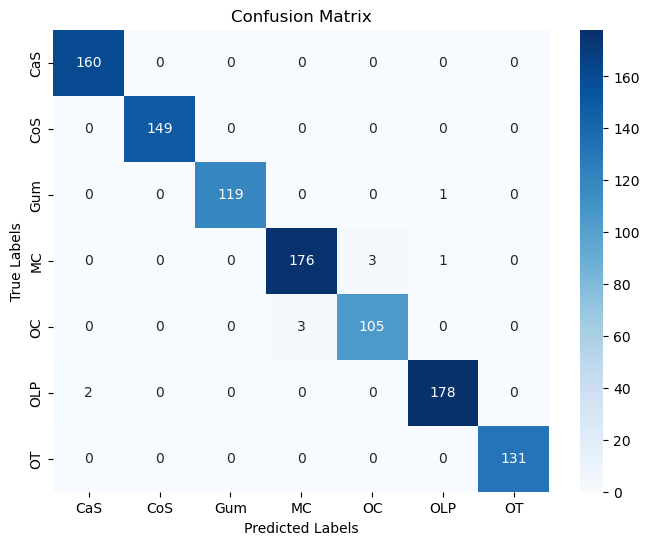

In [23]:
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Predict the classes for the validation data
y_pred_probs = model.predict(x_val)  # Get the predicted probabilities
y_predicted = np.argmax(y_pred_probs, axis=1)  # Convert probabilities to class labels

# Step 2: Compute the confusion matrix
cm = confusion_matrix(y_val, y_predicted)

# Step 3: Calculate the accuracy
accuracy = accuracy_score(y_val, y_predicted)
print(f'Accuracy: {accuracy:.2f}')

# Step 4: Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT'],
            yticklabels=['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT'])
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


33/33 [==============================] - 13s 381ms/step


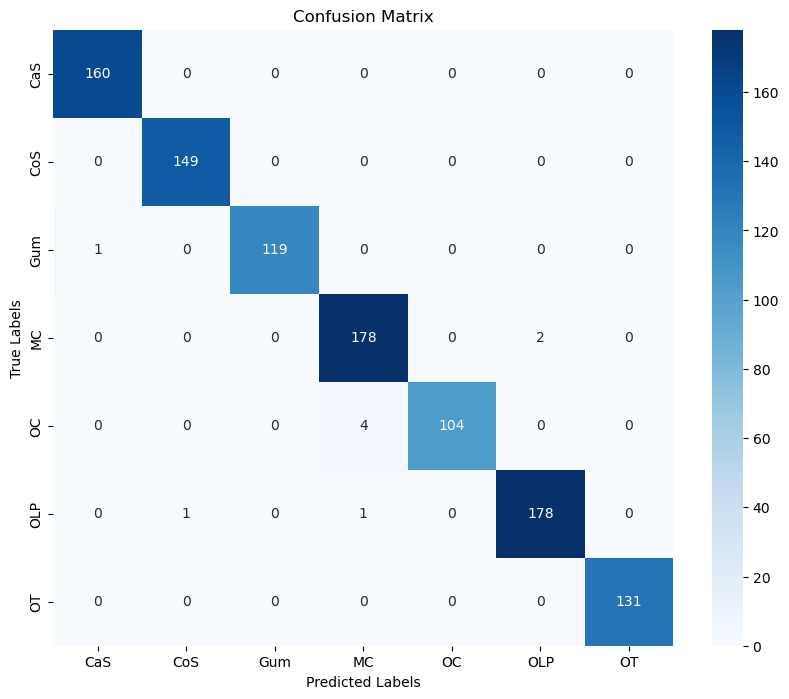

In [27]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Define the class names
class_names = ['CaS', 'CoS', 'Gum', 'MC', 'OC', 'OLP', 'OT']
y_predict=model.predict(x_test)
# Generate the confusion matrix
y_predict = np.argmax(y_predict, axis=1)
conf_matrix = confusion_matrix(y_test, y_predict)

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()


In [26]:
# Save the entire model
model.save(r'C:\Users\DELL\Downloads\IBM\Teeth DataSet\cellula_first_task_model.h5')  # Save to Google Drive or Colab's local filesystem

# If you are working on Kaggle, you might save it to the working directory
# model.save('/kaggle/working/your_model.h5')


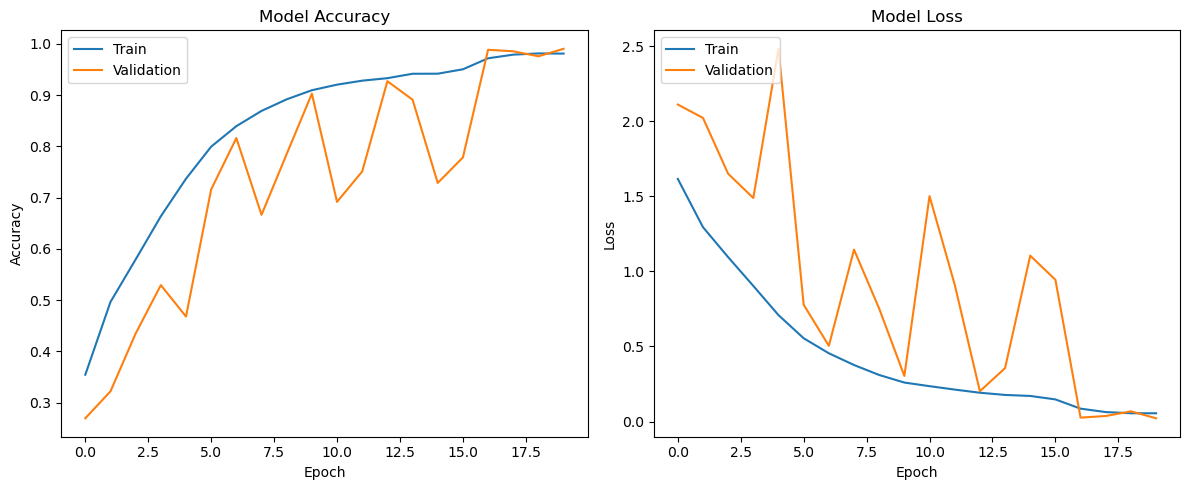

In [28]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()


In [29]:
from tensorflow.keras.utils import plot_model
plot_model(model,to_file='cellula_first_task_model_plot.png')

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.
